# Used Car Price Prediction — Part 1: Local EDA & Preprocessing 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print("✅ Libraries loaded")

✅ Libraries loaded


## Loading the dataset

In [5]:
df = pd.read_csv("used_cars.csv")

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Shape: (4009, 12)

Columns: ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## Check for Missing Values

In [6]:
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

=== Data Types ===
brand             str
model             str
model_year      int64
milage            str
fuel_type         str
engine            str
transmission      str
ext_col           str
int_col           str
accident          str
clean_title       str
price             str
dtype: object

=== Missing Values ===
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


## Basic Statistics

In [7]:
df.describe(include='all')


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean the price Column (Target Variable)

In [9]:
# Remove $ and commas → convert to number
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("Price cleaned ✅")
print(df['price'].describe())

Price cleaned ✅
count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64


## Clean the milage Column

In [10]:
# Remove ' mi.' and commas → convert to number
df['milage'] = df['milage'].astype(str).str.replace(' mi.', '', regex=False)
df['milage'] = df['milage'].str.replace(',', '', regex=False)
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

print("Milage cleaned ✅")
print(df['milage'].describe())

Milage cleaned ✅
count      4009.000000
mean      64717.551010
std       52296.599459
min         100.000000
25%       23044.000000
50%       52775.000000
75%       94100.000000
max      405000.000000
Name: milage, dtype: float64


## Feature Engineering

In [11]:
import datetime
current_year = datetime.datetime.now().year

# Car age is more meaningful than model year
df['car_age'] = current_year - df['model_year']

print("car_age created ✅")
print(df['car_age'].describe())

car_age created ✅
count    4009.000000
mean       10.484410
std         6.104816
min         2.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        52.000000
Name: car_age, dtype: float64


## Drop Unnecessary / High-Cardinality Columns

In [12]:
# 'brand', 'model', 'ext_col', 'int_col' have too many unique values
# They add noise without proper encoding for a small dataset
# We keep the most useful features

cols_to_drop = ['brand', 'model', 'ext_col', 'int_col', 'model_year']
df.drop(columns=cols_to_drop, inplace=True)

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['milage', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title', 'price', 'car_age']


## Handle Missing Values

In [13]:
# Drop rows where price is missing (can't train without target)
df.dropna(subset=['price'], inplace=True)

# Fill numeric columns with median
for col in ['milage', 'car_age']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
cat_cols = ['fuel_type', 'engine', 'transmission', 'accident', 'clean_title']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled ✅")
print(df.isnull().sum())

Missing values handled ✅
milage            0
fuel_type       170
engine            0
transmission      0
accident        113
clean_title     596
price             0
car_age           0
dtype: int64


## Encode Categorical Columns

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['fuel_type', 'engine', 'transmission', 'accident', 'clean_title']

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    print(f"  Encoded: {col}")

print("\nAll categoricals encoded ✅")
print(df.dtypes)

  Encoded: fuel_type
  Encoded: engine
  Encoded: transmission
  Encoded: accident
  Encoded: clean_title

All categoricals encoded ✅
milage          int64
fuel_type       int64
engine          int64
transmission    int64
accident        int64
clean_title     int64
price           int64
car_age         int64
dtype: object


## Remove Outliers on Price

In [15]:
Q1 = df['price'].quantile(0.01)
Q3 = df['price'].quantile(0.99)
before = len(df)
df = df[(df['price'] >= Q1) & (df['price'] <= Q3)]

print(f"Outliers removed: {before} → {len(df)} rows ({before - len(df)} dropped)")

Outliers removed: 4009 → 3932 rows (77 dropped)


## Quick EDA Plots

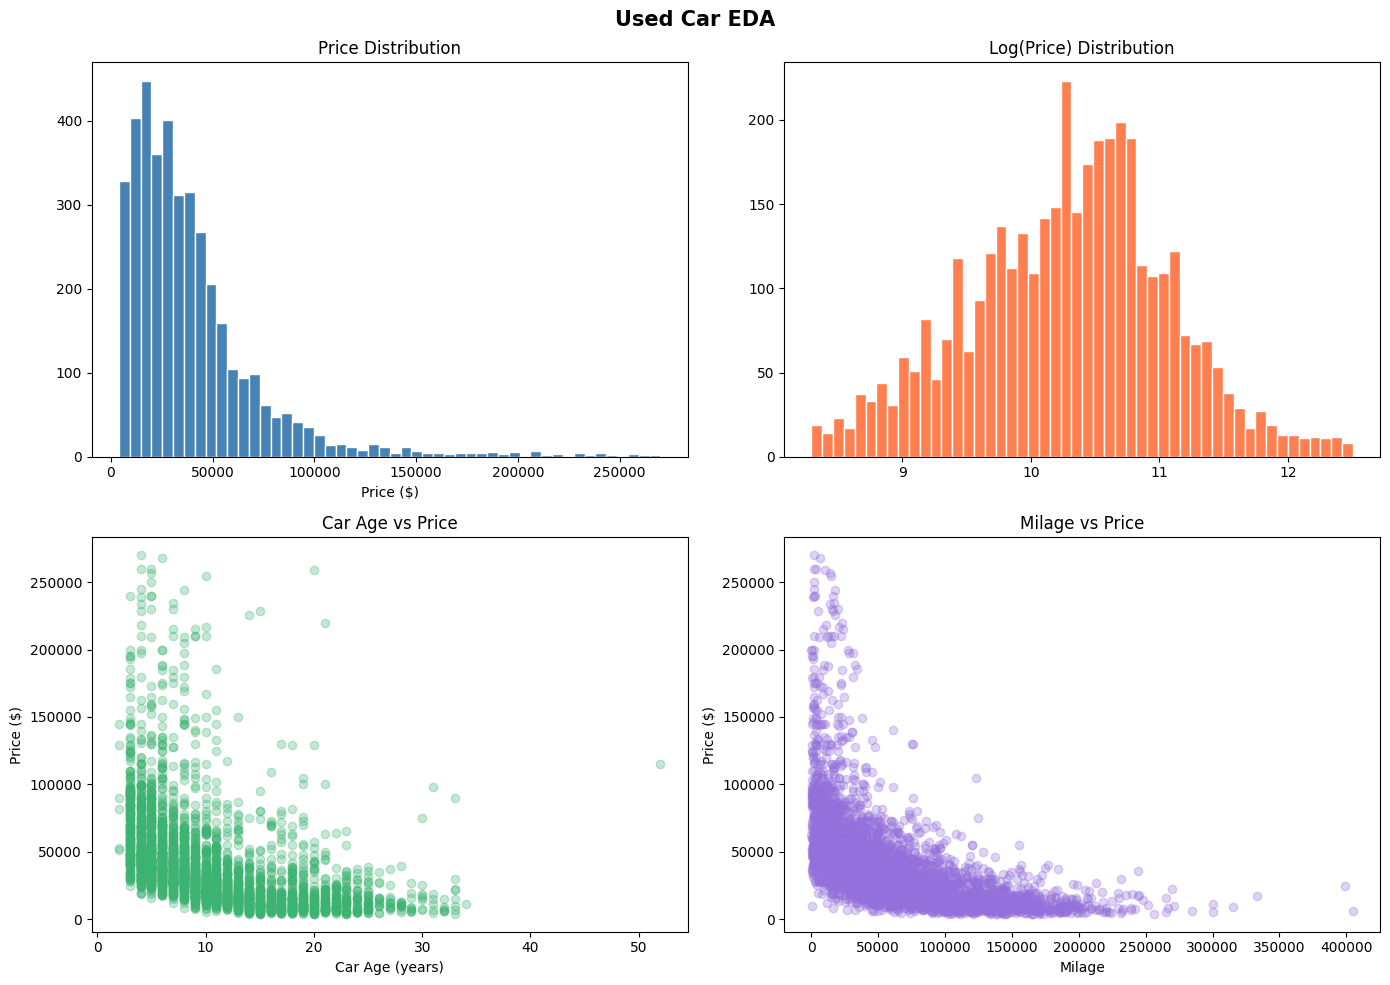

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price distribution
axes[0,0].hist(df['price'], bins=50, color='steelblue', edgecolor='white')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price ($)')

# Log price distribution
axes[0,1].hist(np.log1p(df['price']), bins=50, color='coral', edgecolor='white')
axes[0,1].set_title('Log(Price) Distribution')

# Car age vs price
axes[1,0].scatter(df['car_age'], df['price'], alpha=0.3, color='mediumseagreen')
axes[1,0].set_title('Car Age vs Price')
axes[1,0].set_xlabel('Car Age (years)')
axes[1,0].set_ylabel('Price ($)')

# Milage vs price
axes[1,1].scatter(df['milage'], df['price'], alpha=0.3, color='mediumpurple')
axes[1,1].set_title('Milage vs Price')
axes[1,1].set_xlabel('Milage')
axes[1,1].set_ylabel('Price ($)')

plt.suptitle('Used Car EDA', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots.png', dpi=150, bbox_inches='tight')
plt.show()

## Export for SageMaker

In [18]:
import os
from sklearn.model_selection import train_test_split

# Features and target
feature_cols = [c for c in df.columns if c != 'price']
X = df[feature_cols]
y = df['price']

print("Features:", feature_cols)

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# SageMaker format: NO header, price (target) FIRST
os.makedirs('processed', exist_ok=True)

train_out = pd.concat([y_train.reset_index(drop=True),
                       X_train.reset_index(drop=True)], axis=1)
test_out  = pd.concat([y_test.reset_index(drop=True),
                       X_test.reset_index(drop=True)], axis=1)

train_out.to_csv('processed/train.csv', index=False, header=False)
test_out.to_csv('processed/test.csv',   index=False, header=False)

print(f"\n✅ DONE!")
print(f"Train: {len(train_out)} rows → processed/train.csv")
print(f"Test:  {len(test_out)} rows  → processed/test.csv")
print(f"\nNext step: Upload both CSVs to your S3 bucket!")

Features: ['milage', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title', 'car_age']

✅ DONE!
Train: 3145 rows → processed/train.csv
Test:  787 rows  → processed/test.csv

Next step: Upload both CSVs to your S3 bucket!
